# Getting Data:

In [1]:
# Importing the libraries
import numpy as np
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
import pandas as pd
%matplotlib inline

In [2]:
# Importing the dataset
dataset = pd.read_csv('iris.csv')
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Summary Of the Dataset

In [3]:
# shape
print(dataset.shape)

(100, 5)


In [4]:
# more info on the data
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
sepal_length    100 non-null float64
sepal_width     100 non-null float64
petal_length    100 non-null float64
petal_width     100 non-null float64
species         100 non-null object
dtypes: float64(4), object(1)
memory usage: 4.0+ KB
None


In [5]:
# descriptions
print(dataset.describe())

       sepal_length  sepal_width  petal_length  petal_width
count    100.000000   100.000000    100.000000   100.000000
mean       5.471000     3.094000      2.862000     0.785000
std        0.641698     0.476057      1.448565     0.566288
min        4.300000     2.000000      1.000000     0.100000
25%        5.000000     2.800000      1.500000     0.200000
50%        5.400000     3.050000      2.450000     0.800000
75%        5.900000     3.400000      4.325000     1.300000
max        7.000000     4.400000      5.100000     1.800000


# Check hypothesis consensus:

In [6]:
import scipy.stats as stats

for param in ["sepal_length", "sepal_width", "petal_length", "petal_width"]:
    z, pval = stats.normaltest(dataset[param])
    if(pval < 0.055):
        print("%s has a p-value of %f - distribution is not normal" % (param, pval))
    else:
        print("%s has a p-value of %f" % (param, pval))

sepal_length has a p-value of 0.094052
sepal_width has a p-value of 0.722225
petal_length has a p-value of 0.871472
petal_width has a p-value of 0.861619


# Visualizations:

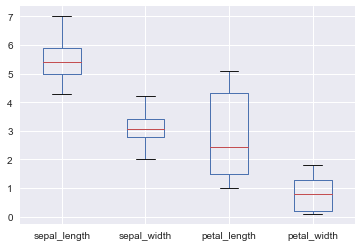

In [7]:
# box and whisker plots
dataset.plot(kind='box', sharex=False, sharey=False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a19666828>,
      dtype=object)

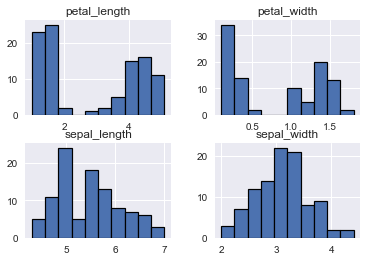

In [8]:
# histograms
dataset.hist(edgecolor='black', linewidth=1.2)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a197cd898>,
      dtype=object)

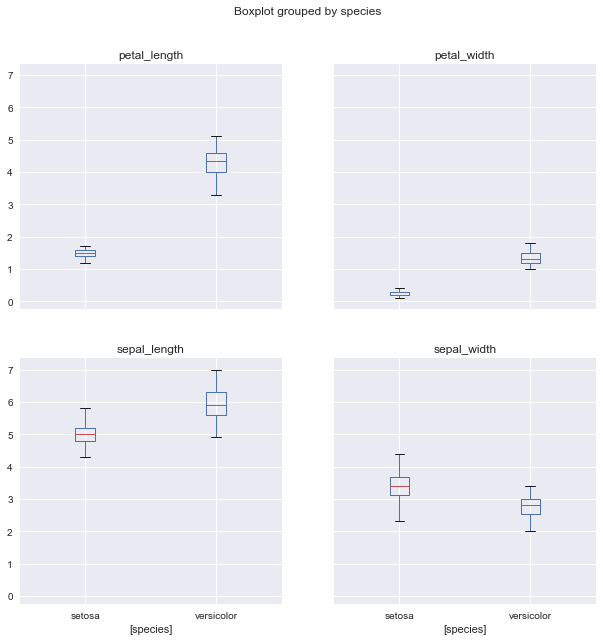

In [9]:
# boxplot on each feature split out by species
dataset.boxplot(by="species",figsize=(10,10))

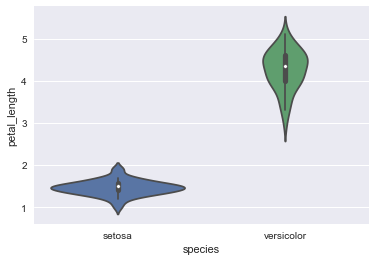

In [10]:
# violinplots on petal-length for each species
sns.violinplot(data=dataset,x="species", y="petal_length")

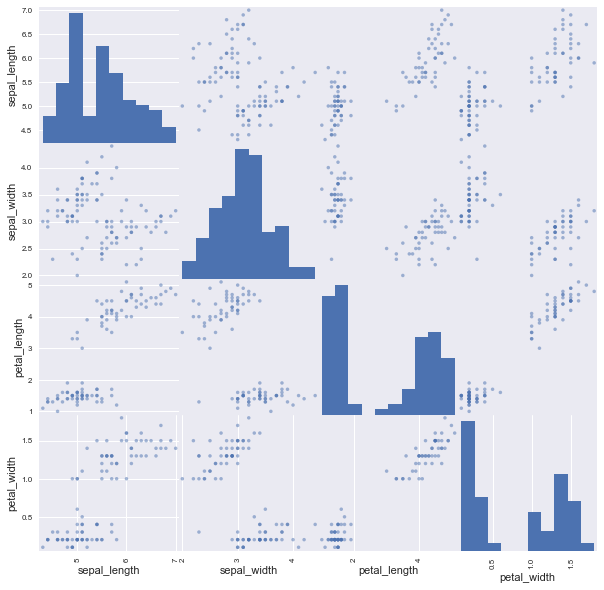

In [11]:
from pandas.plotting import scatter_matrix
# scatter plot matrix
scatter_matrix(dataset,figsize=(10,10))
plt.show()

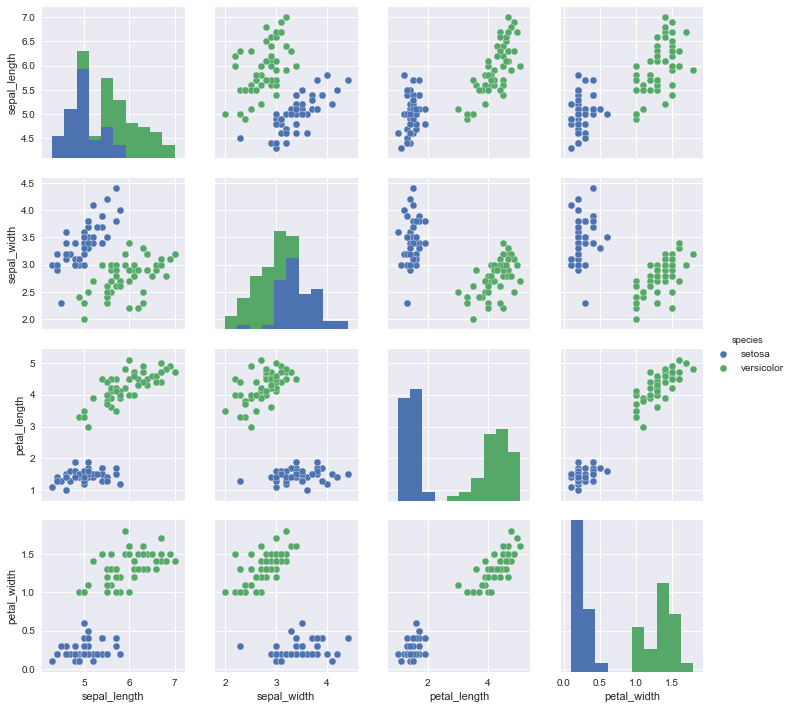

In [12]:
# Using seaborn pairplot to see the bivariate relation between each pair of features
sns.pairplot(dataset, hue="species")

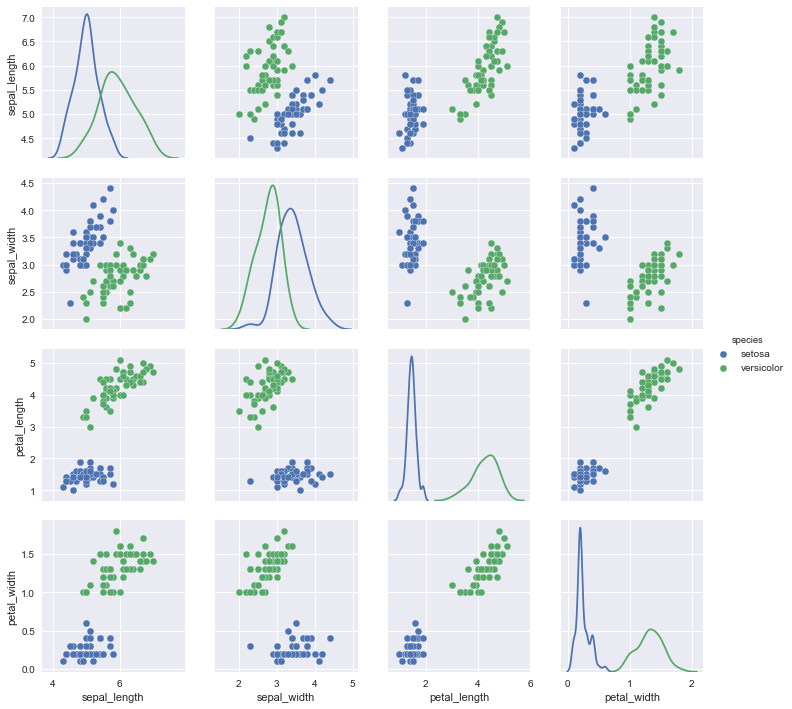

In [13]:
# updating the diagonal elements in a pairplot to show a kde
sns.pairplot(dataset, hue="species",diag_kind="kde")

# Correlation analysis:

In [14]:
dataset.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.197646,0.812389,0.789613
sepal_width,-0.197646,1.000000,-0.595761,-0.560120
petal_length,0.812389,-0.595761,1.000000,0.978856
petal_width,0.789613,-0.560120,0.978856,1.000000


In [15]:
scipy.stats.pearsonr(dataset['sepal_length'], dataset['petal_length'])

(0.8123892148022634, 1.0894296899050234e-24)

# The study of the properties of the multidimensional normal distribution:

## 1) For a set of three variables for which the normal distribution hypothesis is not rejected:

### a) Check the assumption that the analyzed data are a sample of the multidimensional normal distribution:

In [16]:
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D

In [17]:
dataset = dataset.drop(['petal_width'], axis=1)

In [18]:
m = dataset.mean()
m

sepal_length    5.471
sepal_width     3.094
petal_length    2.862
dtype: float64

In [19]:
d = dataset.var()
d

sepal_length    0.411777
sepal_width     0.226630
petal_length    2.098339
dtype: float64

In [20]:
c = dataset.cov()
c

,sepal_length,sepal_width,petal_length
sepal_length,0.411777,-0.060378,0.755149
sepal_width,-0.060378,0.226630,-0.410836
petal_length,0.755149,-0.410836,2.098339


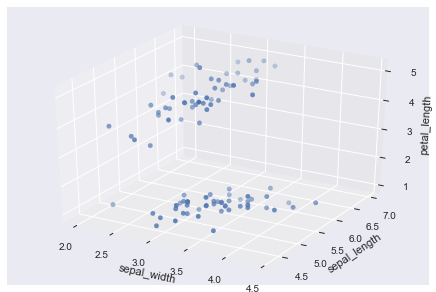

In [21]:
x = np.vstack((dataset['sepal_width'], dataset['sepal_length'], dataset['petal_length']))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X = [x[0], x[1]]
n = 100
ax.scatter(x[0], x[1], x[2])


ax.set_xlabel('sepal_width')
ax.set_ylabel('sepal_length')
ax.set_zlabel('petal_length')

plt.tight_layout(pad=0.5)
plt.show()

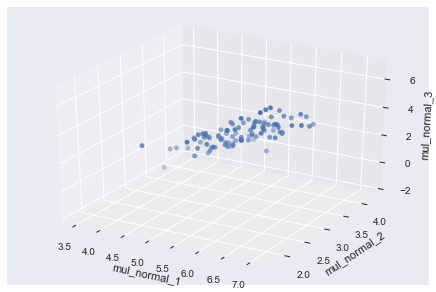

In [22]:
y = np.random.multivariate_normal(m, c, (100)).T

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X = [y[0], y[1]]
n = 100
ax.scatter(y[0], y[1], y[2])


ax.set_xlabel('mul_normal_1')
ax.set_ylabel('mul_normal_2')
ax.set_zlabel('mul_normal_3')

plt.tight_layout(pad=0.5)
plt.show()

### b) If the assumption of a) is fulfilled, estimate the distribution parameters, the vector of the mean and the covariance matrix:

In [23]:
0.5 * x.T @ x 

array([[20.11 , 18.725, 18.495, ..., 23.895, 19.48 , 22.305],
       [18.725, 17.485, 17.225, ..., 22.55 , 18.345, 21.035],
       [18.495, 17.225, 17.01 , ..., 22.005, 17.935, 20.54 ],
       ...,
       [23.895, 22.55 , 22.005, ..., 32.67 , 25.885, 30.545],
       [19.48 , 18.345, 17.935, ..., 25.885, 20.63 , 24.185],
       [22.305, 21.035, 20.54 , ..., 30.545, 24.185, 28.57 ]])

In [24]:
x.mean()

3.809

## 2) According to the sample, find the estimates of the conditional expectation and the conditional covariance matrix for the cases (N = 3):

In [25]:
import math

def calculateConditionalMathExpectation(Y, X, x):
    ME_Y = Y.mean()
    ME_X = X.mean()
    
    V_inv_X = pd.DataFrame(np.linalg.pinv(X.cov().values), X.cov().columns, X.cov().index)
    
    C_YX = pd.concat([Y, X]).cov()
    
    step_one = np.array(C_YX) * np.array(V_inv_X)
    step_two = np.array(x) - np.array(ME_X)
    step_three = np.array(step_one * step_two) + np.array(ME_Y)
    
    return step_three
    
Y = pd.DataFrame(x[0])
X = pd.DataFrame(np.vstack((x[1], x[2])))
X_notDF = np.vstack((x[1], x[2]))

print(X_notDF[0][0])

ME_Y_X = calculateConditionalMathExpectation(Y, X, X_notDF[0][0])

# for i in range(0, 2):
#     tmp = []
#     for j in range(0, 100):
#         tmp.append(calculateConditionalMathExpectation(Y, X, X_notDF[i][j]))
#     ME_Y_X.append(tmp)
        
pd.DataFrame(ME_Y_X).head()

5.1


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-6.516323e+09,-1.071376e+11,1.643106e+11,-3.318086e+10,-1.393976e+10,-5.659679e+10,1.206486e+11,6.998519e+10,1.588010e+11,-4.590083e+10,...,2.930786e+08,-3.324162e+09,-1.281124e+09,-1.656106e+09,-2.676319e+09,1.994497e+09,1.994495e+09,1.408857e+09,-3.923240e+09,3.774003e+09
1,3.814493e+12,1.083446e+12,-2.522471e+12,3.637305e+11,1.187461e+12,7.881228e+11,-2.795662e+12,-1.622419e+12,-2.562323e+12,2.767943e+11,...,-3.072327e+09,5.009246e+10,2.529847e+10,4.627591e+09,5.876023e+10,-3.005548e+10,-3.005545e+10,-2.734425e+10,1.589307e+11,-7.954701e+10
2,-5.775776e+12,2.770037e+12,-4.547400e+11,2.173074e+11,-1.347523e+12,-9.501029e+11,3.998752e+12,1.992988e+12,3.056228e+11,5.874963e+11,...,-2.324281e+09,4.159467e+09,-3.049770e+10,1.236700e+11,-6.394552e+10,-2.495680e+09,-2.495702e+09,3.454945e+10,-2.728837e+11,9.625094e+10
3,3.778443e+12,-6.724124e+12,5.285223e+12,-1.197905e+12,1.354368e+12,-3.732185e+11,-1.985281e+12,-7.844002e+11,3.917967e+12,-2.336001e+12,...,1.180526e+10,-9.660079e+10,8.809669e+09,-2.200851e+11,1.306663e+10,5.796047e+10,5.796045e+10,-9.909994e+09,2.676959e+11,-3.173211e+10
4,-6.698078e+11,6.941492e+12,-7.450714e+12,1.057735e+12,1.719622e+12,6.855492e+11,-1.059636e+12,-7.904040e+11,-5.395538e+12,2.724209e+12,...,-1.305088e+10,1.212603e+11,-2.288264e+09,2.411169e+11,4.241871e+10,-7.275616e+10,-7.275611e+10,-1.233774e+08,-4.421775e+10,-1.300826e+10


In [26]:
def calculateContitionalCovMatrix(Y, X, x):
    V_Y = Y.cov()
    V_inv_X = pd.DataFrame(np.linalg.pinv(X.cov().values), X.cov().columns, X.cov().index)
    C_YX = pd.concat([Y, X]).cov()
    C_XY = pd.concat([X, Y]).cov()
    
    step_one = np.array(C_YX) * np.array(V_inv_X)
    step_two = np.array(step_one) * np.array(C_XY)
    step_three = np.array(V_Y) - step_two
    
    return step_three

Y = pd.DataFrame(x[0])
X = pd.DataFrame(np.vstack((x[1], x[2])))
X_notDF = np.vstack((x[1], x[2]))

print(X_notDF[0][0])

C_Y_X = calculateContitionalCovMatrix(Y, X, X_notDF[0][0])        
pd.DataFrame(C_Y_X).head()

5.1


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.022842e+09,3.557518e+11,-4.921494e+11,9.282549e+10,4.886253e+10,2.499387e+11,-3.401142e+11,-2.449482e+11,-4.006116e+11,1.519559e+11,...,-3.976099e+09,-3.689820e+10,2.133071e+10,5.482584e+09,3.465833e+10,-3.689820e+10,-3.689816e+10,3.301421e+10,1.451599e+10,-5.585524e+10
1,-1.335073e+13,-3.403133e+12,7.147000e+12,-9.625550e+11,-3.937371e+12,-3.292319e+12,7.455099e+12,5.371522e+12,6.114634e+12,-8.668032e+11,...,3.942820e+10,5.259708e+11,-3.984510e+11,-1.449167e+10,-7.198128e+11,5.259708e+11,5.259705e+11,-6.061310e+11,-5.562574e+11,1.113658e+12
2,1.963764e+13,-8.452165e+12,1.251618e+12,-5.586390e+11,4.340444e+12,3.855579e+12,-1.035867e+13,-6.409879e+12,-7.084892e+11,-1.787226e+12,...,2.897603e+10,4.242656e+10,4.666148e+11,-3.762172e+11,7.609517e+11,4.242656e+10,4.242693e+10,7.439649e+11,9.278047e+11,-1.309013e+12
3,-1.171317e+13,1.870686e+13,-1.326339e+13,2.807771e+12,-3.977566e+12,1.380909e+12,4.689046e+12,2.300201e+12,-8.281157e+12,6.479330e+12,...,-1.341865e+11,-8.983873e+11,-1.228949e+11,6.104467e+11,-1.417729e+11,-8.983873e+11,-8.983869e+11,-1.945662e+11,-8.298574e+11,3.934782e+11
4,2.411308e+12,-2.242636e+13,2.171351e+13,-2.879104e+12,-5.864815e+12,-2.945650e+12,2.906430e+12,2.691646e+12,1.324359e+13,-8.774822e+12,...,1.722716e+11,1.309611e+12,3.706988e+10,-7.766501e+11,-5.344758e+11,1.309611e+12,1.309610e+12,-2.813005e+09,1.591839e+11,1.873190e+11


In [27]:
import math

def calculateConditionalMathExpectation(Y, X, x):
    ME_Y = Y.mean()
    ME_X = X.mean()
    
    V_inv_X = pd.DataFrame(np.linalg.pinv(X.cov().values), X.cov().columns, X.cov().index)
    
    C_YX = pd.concat([Y, X]).cov()
    
    step_one = np.array(C_YX) * np.array(V_inv_X)
    step_two = x - np.array(ME_X)
    step_three = np.array(step_one * np.array(step_two)) + np.array(ME_Y)
    
    return step_three
    
Y = pd.DataFrame(np.vstack((x[0], x[1])))
X = pd.DataFrame(x[2])
X_notDF = x[2]

print(X_notDF[0])

ME_Y_X = calculateConditionalMathExpectation(Y, X, X_notDF[0])
        
pd.DataFrame(ME_Y_X).head()

1.4


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,2.830150,2.890953,3.113910,3.013910,3.519650,3.813910,3.331128,3.308171,2.813910,2.996692,...,2.433560,2.822081,2.416342,2.145039,2.533560,2.845039,2.739299,2.710603,2.350778,2.633560
1,3.240953,2.692382,2.957143,2.857143,3.373334,3.657143,3.205715,3.140953,2.657143,2.808572,...,2.130477,2.498096,2.081906,1.862858,2.230477,2.562858,2.446668,2.365716,2.079049,2.330477
2,3.463910,2.957143,3.166166,3.066166,3.568421,3.866166,3.372933,3.363910,2.866166,3.059399,...,2.534587,2.930076,2.527821,2.239099,2.634587,2.939099,2.836843,2.825565,2.441354,2.734587
3,3.463910,2.957143,3.166166,3.066166,3.568421,3.866166,3.372933,3.363910,2.866166,3.059399,...,2.534587,2.930076,2.527821,2.239099,2.634587,2.939099,2.836843,2.825565,2.441354,2.734587
4,3.519650,3.023334,3.218421,3.118421,3.617193,3.918421,3.414737,3.419650,2.918421,3.122106,...,2.635615,3.038071,2.639299,2.333159,2.735615,3.033159,2.934387,2.940527,2.531931,2.835615


In [28]:
def calculateContitionalCovMatrix(Y, X, x):
    V_Y = Y.cov()
    V_inv_X = pd.DataFrame(np.linalg.pinv(X.cov().values), X.cov().columns, X.cov().index)
    C_YX = pd.concat([Y, X]).cov()
    C_XY = pd.concat([X, Y]).cov()
    
    step_one = np.array(C_YX) * np.array(V_inv_X)
    step_two = step_one * np.array(C_XY)
    step_three = np.array(V_Y) - step_two
    
    return step_three

Y = pd.DataFrame(np.vstack((x[0], x[1])))
X = pd.DataFrame(x[2])
X_notDF = x[2]

print(X_notDF[0])

C_Y_X = calculateContitionalCovMatrix(Y, X, X_notDF[0])        
pd.DataFrame(C_Y_X).head()

1.4


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.840933,0.418939,0.513743,0.513743,0.522194,0.513743,0.520796,0.499192,0.513743,0.451790,...,-0.245076,-0.451080,-0.563232,-0.063473,-0.245076,-0.063473,-0.151224,-0.681484,0.018179,-0.245076
1,0.418939,0.252332,0.457270,0.457270,0.487000,0.457270,0.520653,0.418939,0.457270,0.316469,...,-0.862158,-1.188280,-1.364245,-0.570444,-0.862158,-0.570444,-0.712000,-1.548811,-0.437490,-0.862158
2,0.513743,0.457270,0.521844,0.521844,0.524585,0.521844,0.513980,0.513743,0.521844,0.481456,...,-0.079461,-0.251144,-0.345028,0.070776,-0.079461,0.070776,-0.001662,-0.444273,0.137853,-0.079461
3,0.513743,0.457270,0.521844,0.521844,0.524585,0.521844,0.513980,0.513743,0.521844,0.481456,...,-0.079461,-0.251144,-0.345028,0.070776,-0.079461,0.070776,-0.001662,-0.444273,0.137853,-0.079461
4,0.522194,0.487000,0.524585,0.524585,0.522305,0.524585,0.503734,0.522194,0.524585,0.503402,...,0.066114,-0.074108,-0.151224,0.187654,0.066114,0.187654,0.129219,-0.233011,0.241418,0.066114
